In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import savgol_filter
from scipy.optimize import curve_fit
np.set_printoptions(suppress=True)

In [18]:
def func(x, m1, m2, m3, m4, m5, m6):
    return m1 + m2 /(1 + np.exp(-m3 * (x-m4))) - m2/(1 + np.exp(-m5 * (x-m6)))

In [19]:
data = pd.read_csv(r'D:\Desktop\mypaper\version20\point\lai.csv',sep=',',header=0)

In [20]:
# 设置figure_size尺寸
plt.rcParams['figure.figsize'] = (8.0, 10.0) 
#图片像素
plt.rcParams['savefig.dpi'] = 500 
#分辨率
plt.rcParams['figure.dpi'] = 500 
#X轴数字大小
plt.rcParams['axes.labelsize'] = 10.5

In [21]:
x=np.arange(1,366,4)
lai = np.loadtxt(open("D:\\Desktop\\mypaper\\version20\\point\\lai.csv","rb"),delimiter=",",skiprows=1,usecols=[1]) 
DenoisingValueLai = savgol_filter(lai, 15, 3, mode= 'nearest')
ParametersLai, pcovLai = curve_fit(func, x, DenoisingValueLai, p0=[1,3,0.05,140,0.05,270], maxfev=1000000)#,method='trf', maxfev=1000000)
ParametersLai=np.around(ParametersLai,2)
fittingValueLai=func(x,ParametersLai[0],ParametersLai[1],ParametersLai[2],ParametersLai[3],ParametersLai[4],ParametersLai[5])

In [22]:
ndvi = np.loadtxt(open("D:\\Desktop\\mypaper\\version20\\point\\ndvi.csv","rb"),delimiter=",",skiprows=1,usecols=[1])
size=np.arange(0,361,4)
ndvilist=[]
for i in size:
    data4=(ndvi[i]+ndvi[i+1]+ndvi[i+2]+ndvi[i+3])/4
    ndvilist.append(data4)
ndvilist.append(ndvi[-1])
DenoisingValuendvi = savgol_filter(ndvilist, 15, 3, mode= 'nearest')
Parametersndvi, pcovndvi = curve_fit(func, x, DenoisingValuendvi, p0=[0.1,0.3,0.05,140,0.05,270], maxfev=1000000)#,method='trf', maxfev=1000000)
Parametersndvi=np.around(Parametersndvi,2)
fittingValuendvi=func(x,Parametersndvi[0],Parametersndvi[1],Parametersndvi[2],Parametersndvi[3],Parametersndvi[4],Parametersndvi[5])

In [23]:
evi = np.loadtxt(open("D:\\Desktop\\mypaper\\version20\\point\\evi.csv","rb"),delimiter=",",skiprows=1,usecols=[1])
size=np.arange(0,361,4)
evilist=[]
for i in size:
    data4=(evi[i]+evi[i+1]+evi[i+2]+evi[i+3])/4
    evilist.append(data4)
evilist.append(evi[-1])
DenoisingValueevi = savgol_filter(evilist, 15, 3, mode= 'nearest')
Parametersevi, pcovevi = curve_fit(func, x, DenoisingValueevi, p0=[0.1,0.3,0.05,140,0.05,270], maxfev=1000000)#,method='trf', maxfev=1000000)
Parametersevi=np.around(Parametersevi,2)
fittingValueevi=func(x,Parametersevi[0],Parametersevi[1],Parametersevi[2],Parametersevi[3],Parametersevi[4],Parametersevi[5])

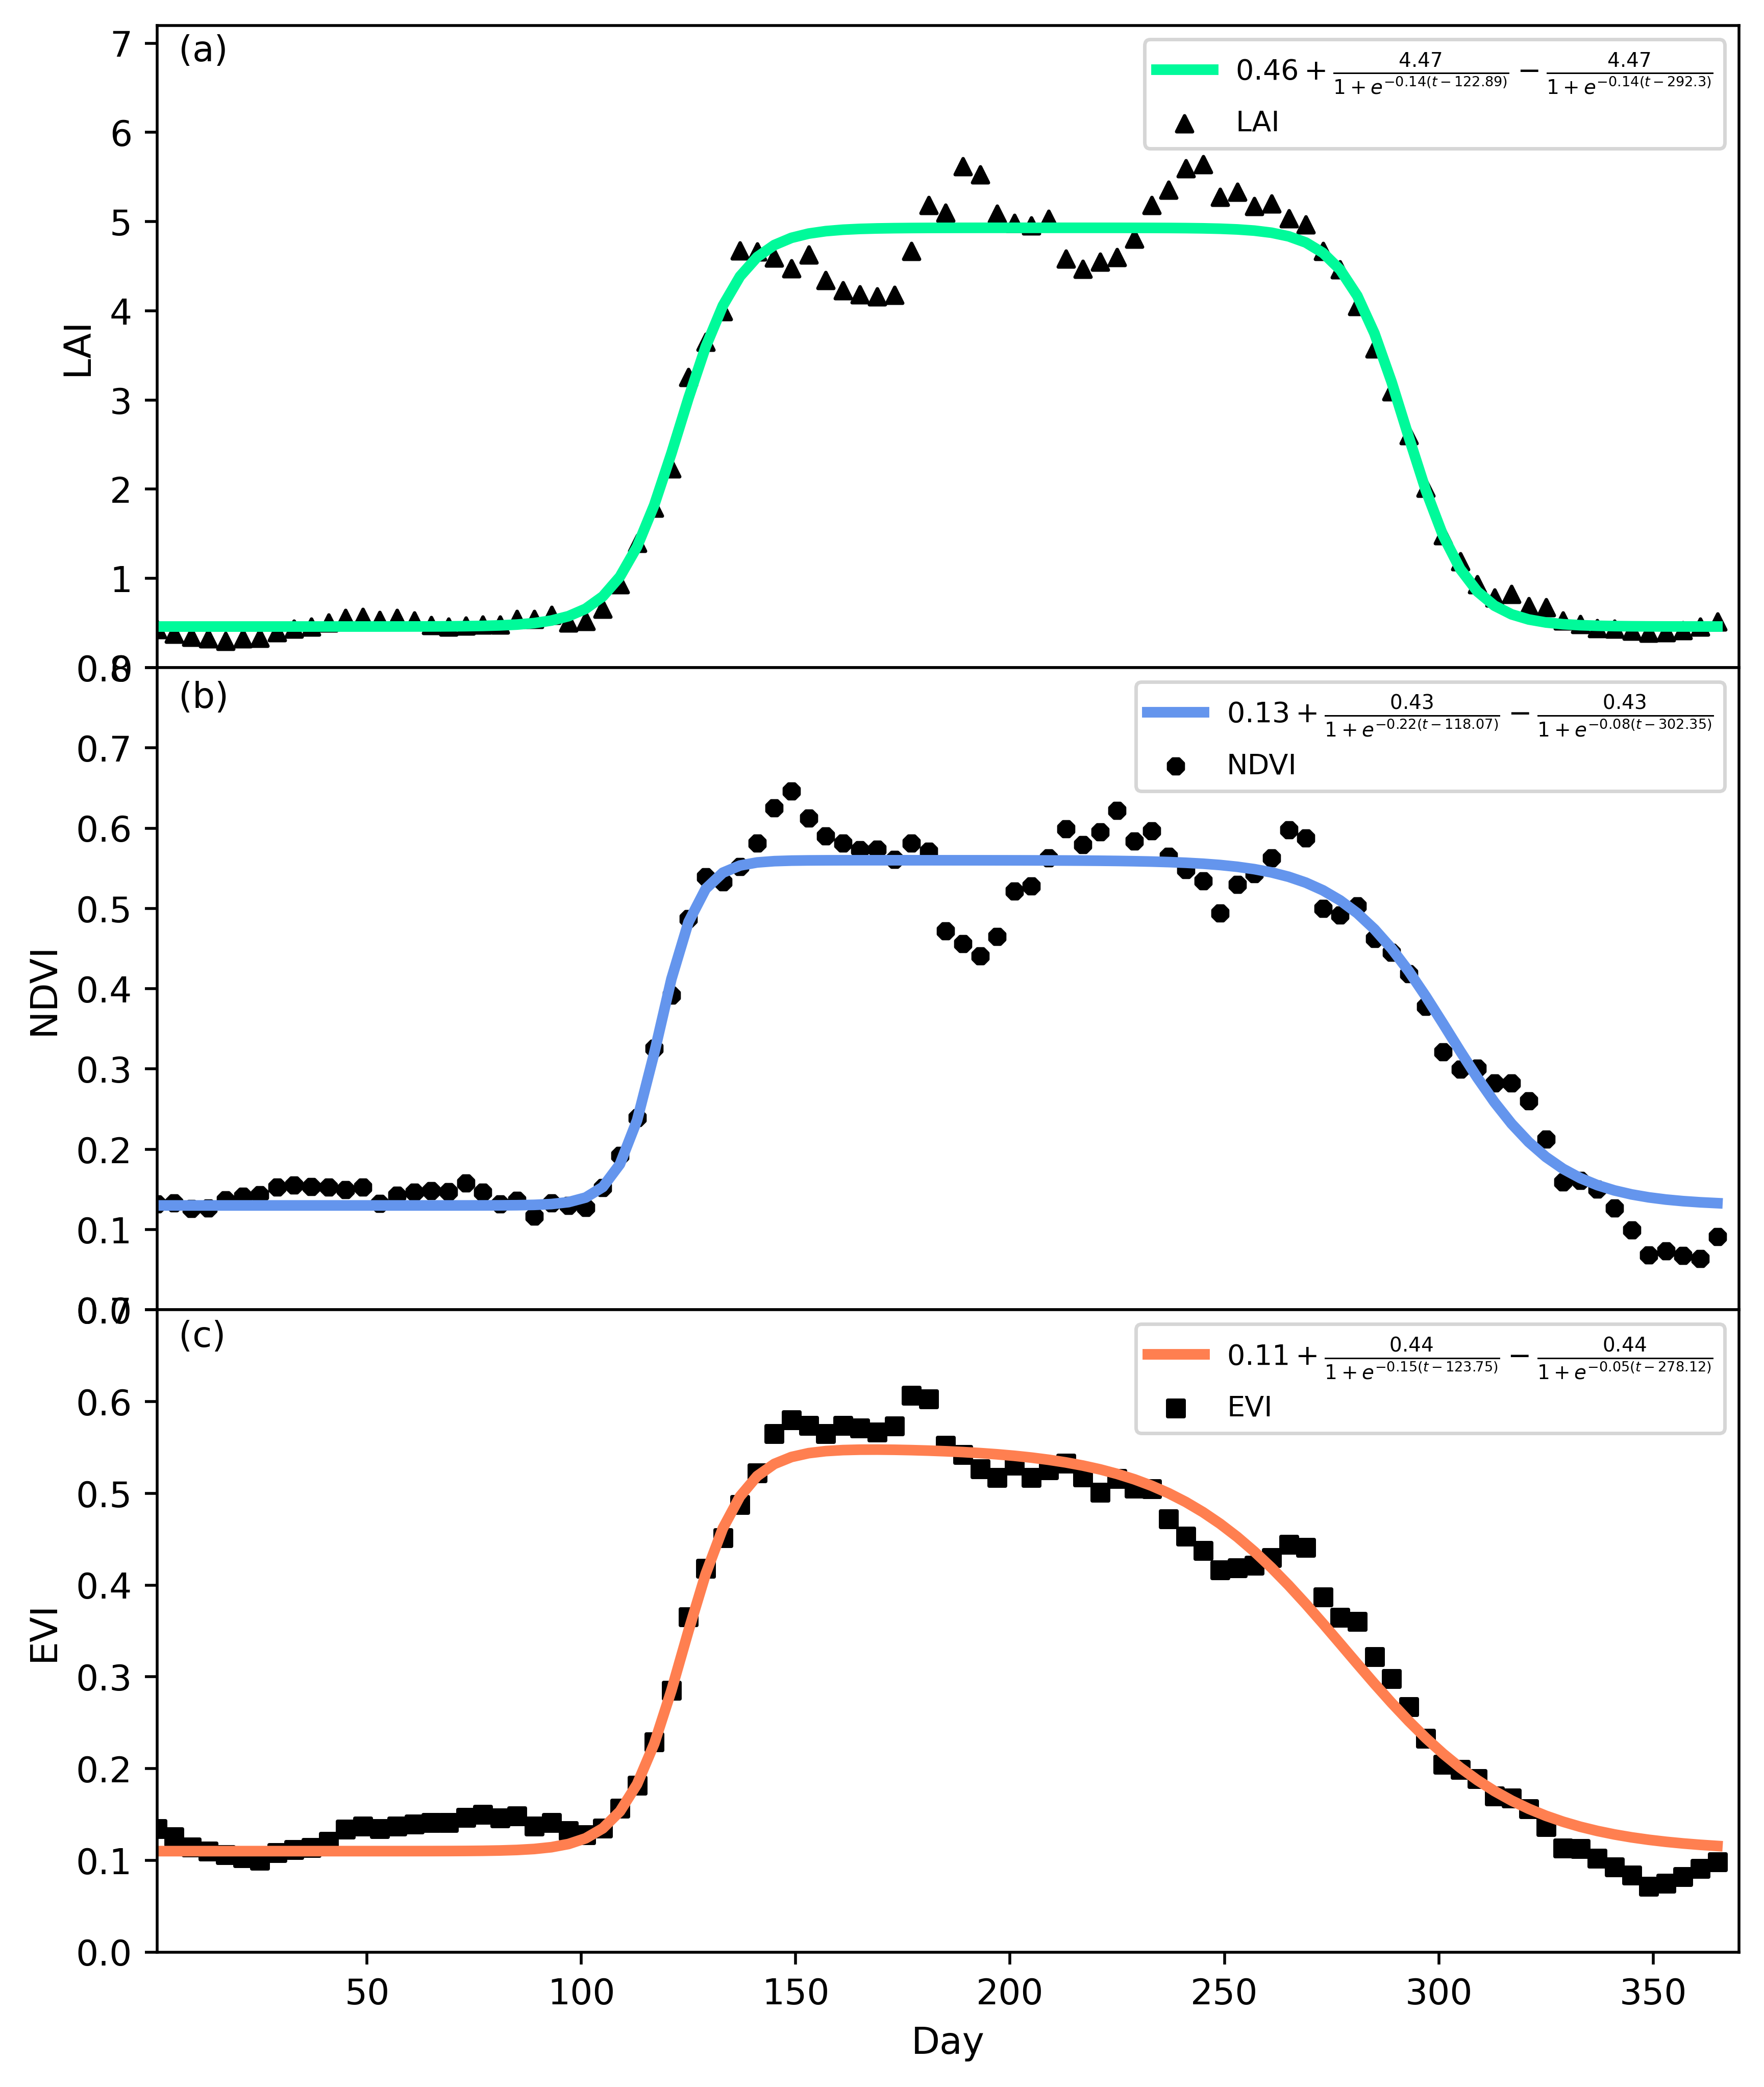

In [29]:
legendsize=8
pointsize=20
########################LAI###########################
plt.subplot(3,1,1)

plt.plot(x,fittingValueLai,color='mediumspringgreen',linewidth=3.0,\
         label=r'$%s+\frac{%s}{1+e^{-%s(t-%s)}}-\frac{%s}{1+e^{-%s(t-%s)}}$'%\
             (ParametersLai[0],ParametersLai[1],ParametersLai[2],ParametersLai[3],\
                 ParametersLai[1],ParametersLai[4],ParametersLai[5]))
plt.scatter(x,DenoisingValueLai,marker='^',color='black',s=pointsize,label='LAI')
plt.xlim((1,370))
plt.ylim((0,7.2))
plt.xlabel('Day')
plt.ylabel('LAI')
plt.text(6,6.8,'(a)')
plt.legend(loc='upper right',prop={'size':legendsize})
########################NDVI###########################
plt.subplot(3,1,2)
plt.plot(x,fittingValuendvi,color='cornflowerblue',linewidth=3.0,\
         label=r'$%s+\frac{%s}{1+e^{-%s(t-%s)}}-\frac{%s}{1+e^{-%s(t-%s)}}$'%\
             (Parametersndvi[0],Parametersndvi[1],Parametersndvi[2],Parametersndvi[3],\
                 Parametersndvi[1],Parametersndvi[4],Parametersndvi[5]))
plt.scatter(x,DenoisingValuendvi,marker='8',color='black',s=pointsize,label='NDVI')
plt.xlim((1,370))
plt.ylim((0,0.8))
plt.xlabel('Day')
plt.ylabel('NDVI')
plt.text(6,0.75,'(b)')
plt.legend(loc='upper right',prop={'size':legendsize})

########################EVI###########################
plt.subplot(3,1,3)
plt.plot(x,fittingValueevi,color='coral',linewidth=3.0,\
         label=r'$%s+\frac{%s}{1+e^{-%s(t-%s)}}-\frac{%s}{1+e^{-%s(t-%s)}}$'%\
             (Parametersevi[0],Parametersevi[1],Parametersevi[2],Parametersevi[3],\
                 Parametersevi[1],Parametersevi[4],Parametersevi[5]))
plt.scatter(x,DenoisingValueevi,marker='s',color='black',s=pointsize,label='EVI')
plt.xlim((1,370))
plt.ylim((0,0.7))
plt.xlabel('Day')
plt.ylabel('EVI')
plt.text(6,0.66,'(c)')
plt.legend(loc='upper right',prop={'size':legendsize})
plt.subplots_adjust(wspace=0.0,hspace=0.0)
plt.savefig('D:/Desktop/mypaper/version20/picture/LAI-NDVI-EVI1.jpg',bbox_inches='tight',pad_inches=0.02)